## SBDS_Capstone_Proejct_1 - Predict Adults with 50K/yr Income - In Depth Analysis Using Machine Learning Models

This capstone project is based on dataset called ‘Adult Data Set’ - (http://archive.ics.uci.edu/ml/datasets/Adult) from UCI’s Machine Learning Repository.
This project aims to solve following problems:
1.	Predict whether a person’s income exceed $50K/yr based on the census data
2.	Identify various segments which may exist in the population based on the data collected

We have already completed the Data Wrangling and Data Story part of the project. Now based on the exploratory data analysis done so far, we will first forms some hypothesis based on the results of EDA and then we will apply the infrenetial statstical principals and methods to test the validity of the hypothesis and finally forms some conclusions about the fetures of this dataset which should ultilmately help us in building the requisite Machine Learning models to predict the prices effectively and accurately.

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import scipy.stats
from scipy.stats import t
from numpy.random import seed
import seaborn as sns
import sklearn.model_selection

%matplotlib inline

In [2]:
# I will first load data for US Geo and do an EDA for the same
adult = pd.read_csv('adult_csv.csv')

In [3]:
adult.shape

(32561, 15)

In [4]:
pop = 32561

In [5]:
adult1 = adult.drop(['fnlwgt'], axis=1)
adult1.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
income = adult1['income'].value_counts(dropna=False)
print(income)

 <=50K    24720
 >50K      7841
Name: income, dtype: int64


#### Majority of the population - 24,720 people (76%) falls in the low income, <=50K group, with rest of the population - 7841 people (24%) falling in high income, >50K group

In [7]:
#create a copy similar to adult2 table
adult3 = adult.drop(['fnlwgt', 'capital-gain', 'capital-loss'], axis=1)

### Now let's change the data type of non-integer attributes from 'object' to 'category' for ease of processing later

In [8]:
adult3.workclass = adult3.workclass.astype('category')
adult3.education = adult3.education.astype('category')
adult3['marital-status'] = adult3['marital-status'].astype('category')
adult3.sex = adult3.sex.astype('category')
adult3.occupation = adult3.occupation.astype('category')
adult3.relationship = adult3.relationship.astype('category')
adult3.race = adult3.race.astype('category')
adult3['native-country'] = adult3['native-country'].astype('category')
#adult3.income = adult3.income.astype('category')

### Next we will change the values <=50K and >50K to 0 and 1 repsectively, so that these values can then be utilized easily for EDA and ML modeling later

In [9]:
adult4=adult3.copy()
adult4.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


#### Now let's convert all the non-integer attributes in to categories from objects. This wouold help in reduced usage of memory and also in running advanced statistical and machine learning model.

In [10]:
replace_map = {'income':{'<=50K' : 0, '>50K' : 1}}
adult4.replace(replace_map, inplace=True, regex=True)
adult4.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,0


### Further Numerical and Visual Data Analysis of the 2 income groups

### Age distribution among <= 50K and >50K segments
The >50K income group clearly has people with higher age than people from <=50K income group. The average age is 44.25 years in high income group vis-a-vis average age of 36.87 years in low income group

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

<Figure size 720x360 with 0 Axes>

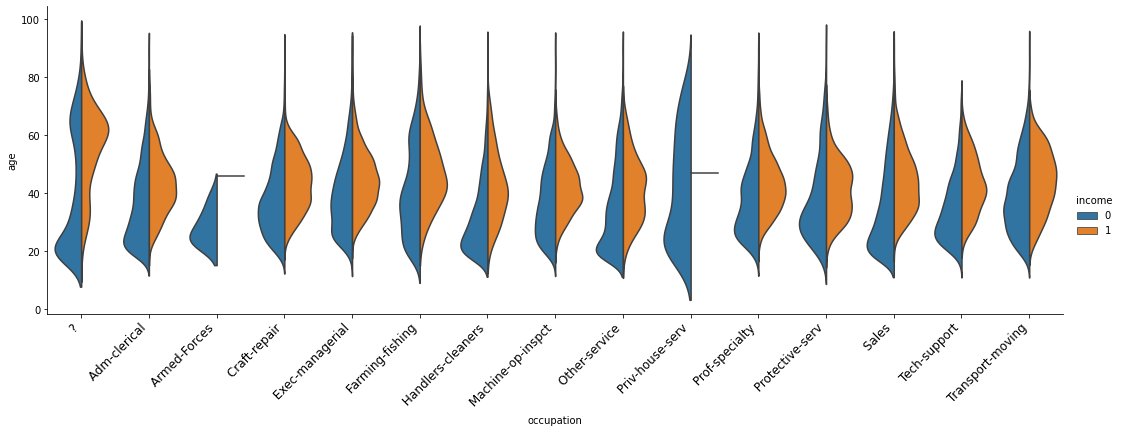

In [11]:
plt.figure(figsize=(10,5))
g= sns.catplot(x='occupation', y='age', hue='income', kind='violin', inner=None, split=True, data=adult4, height=5, aspect=3)
#sns.swarmplot(x='occupation', y='age', color='k', size=0.5, data=adult4, ax=g.ax)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large')

#### The overall trend of age difference between higher income group and lower income group continues across various occupation categories as well

#### The overall trend of 'hours worked per week' difference between higher income group and lower income group continues across various occupation categories as well

#### __Initial Analysis based on the charts__
The charts above illustrate how the distrubution of people for each of the attributes (feature) is in the dataset. Following are the key observations
1. For attribute 'native-country' the dominating value is USA
2. For attribute 'hours-per-week' the dominating value is @40 hours
3. For attribite 'race' the dominating value is for White race.
For these attributes, lateron we will see if we can aggregate the 'other' values in one attribute (e.g. for native-country we could divide the dataset between 'USA' and 'NonUSA')
4. For all other attributes the data is spread across many categories. Thus we will have to do further analysis for all these categorical attributes to find out their influence on income.

In [12]:
adult5 = adult4.copy()
adult5.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,0


In [13]:
adult5['native'] = adult5['native-country'].copy()
adult5['native'] = adult5['native'].astype('object')
adult5.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income,native
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,0,United-States
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,0,United-States
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,0,United-States
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,0,United-States
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,0,Cuba


In [14]:
replace_map1 = {'native':{'United-States':'US', 'Cuba':'NonUS','Jamaica':'NonUS', 'India':'NonUS', '\?':'NonUS', 'Mexico':'NonUS',
       'South':'NonUS', 'Puerto-Rico':'NonUS', 'Honduras':'NonUS', 'England':'NonUS', 'Canada':'NonUS',
       'Germany':'NonUS', 'Iran':'NonUS', 'Philippines':'NonUS', 'Italy':'NonUS', 'Poland':'NonUS',
       'Columbia':'NonUS', 'Cambodia':'NonUS', 'Thailand':'NonUS', 'Ecuador':'NonUS', 'Laos':'NonUS',
       'Taiwan':'NonUS', 'Haiti':'NonUS', 'Portugal':'NonUS', 'Dominican-Republic':'NonUS',
       'El-Salvador':'NonUS', 'France':'NonUS', 'Guatemala':'NonUS', 'China':'NonUS', 'Japan':'NonUS',
       'Yugoslavia':'NonUS', 'Peru':'NonUS', 'Outlying-US\(Guam-USVI-etc\)':'NonUS', 'Scotland':'NonUS',
       'Trinadad&Tobago':'NonUS', 'Greece':'NonUS', 'Nicaragua':'NonUS', 'Vietnam':'NonUS', 'Hong':'NonUS',
       'Ireland':'NonUS', 'Hungary':'NonUS', 'Holand-Netherlands':'NonUS'}}
adult5.replace(replace_map1, inplace=True, regex=True)
adult5.native.value_counts()
# Please note the backslash used for '\?' and 'Outlying-US\(Guam-USVI-etc\)' so that those charecters are escaped while executing this command.

 US       29170
 NonUS     3391
Name: native, dtype: int64

### Let's do the analysis of how attributes age, education-num, hours-per-week differe between people with <=50K and >50K income

In [15]:
n = adult5.income.count()
print(n)

32561


In [16]:
highinc = adult5[adult5.income==1]
print(highinc.shape)
print(highinc.describe())
highinc.head()

(7841, 13)
               age  education-num  hours-per-week  income
count  7841.000000    7841.000000     7841.000000  7841.0
mean     44.249841      11.611657       45.473026     1.0
std      10.519028       2.385129       11.012971     0.0
min      19.000000       2.000000        1.000000     1.0
25%      36.000000      10.000000       40.000000     1.0
50%      44.000000      12.000000       40.000000     1.0
75%      51.000000      13.000000       50.000000     1.0
max      90.000000      16.000000       99.000000     1.0


,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income,native
7,52,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,45,United-States,1,US
8,31,Private,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,50,United-States,1,US
9,42,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,40,United-States,1,US
10,37,Private,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,80,United-States,1,US
11,30,State-gov,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,40,India,1,NonUS


In [17]:
lowinc = adult5[adult5.income==0]
print(lowinc.shape)
print(lowinc.describe())
lowinc.head()

(24720, 13)
                age  education-num  hours-per-week   income
count  24720.000000   24720.000000    24720.000000  24720.0
mean      36.783738       9.595065       38.840210      0.0
std       14.020088       2.436147       12.318995      0.0
min       17.000000       1.000000        1.000000      0.0
25%       25.000000       9.000000       35.000000      0.0
50%       34.000000       9.000000       40.000000      0.0
75%       46.000000      10.000000       40.000000      0.0
max       90.000000      16.000000       99.000000      0.0


,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income,native
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,0,US
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,0,US
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,0,US
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,0,US
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,0,NonUS


#### With details on stastical analysis of the 3 attributes (age, education, hours-per-week) as analyzed in the last section of this capstone project (Statistical Analysis part) we will now work on applying the machine laearning principals, concepts and models to arrive at a model which can be used to predict the income of the sample based on the demographic data as collected in the sensus.

In [18]:
adult5.tail()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income,native
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,0,US
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,1,US
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,0,US
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,0,US
32560,52,Self-emp-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,1,US


In [19]:
adult5.describe()

,age,education-num,hours-per-week,income
count,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,40.437456,0.240810
std,13.640433,2.572720,12.347429,0.427581
min,17.000000,1.000000,1.000000,0.000000
25%,28.000000,9.000000,40.000000,0.000000
50%,37.000000,10.000000,40.000000,0.000000
75%,48.000000,12.000000,45.000000,0.000000
max,90.000000,16.000000,99.000000,1.000000


#### Additional Data Cleaning

In [20]:
# Changing type back to Object from Category as mapping method is not working on Categorical type
adult5['workclass'] = adult5['workclass'].astype('object')
adult5['occupation'] = adult5['occupation'].astype('object')

In [21]:
adult5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             32561 non-null  int64   
 1   workclass       32561 non-null  object  
 2   education       32561 non-null  category
 3   education-num   32561 non-null  int64   
 4   marital-status  32561 non-null  category
 5   occupation      32561 non-null  object  
 6   relationship    32561 non-null  category
 7   race            32561 non-null  category
 8   sex             32561 non-null  category
 9   hours-per-week  32561 non-null  int64   
 10  native-country  32561 non-null  category
 11  income          32561 non-null  int64   
 12  native          32561 non-null  object  
dtypes: category(6), int64(4), object(3)
memory usage: 1.9+ MB


In [22]:
# Replace '?' value for some records in 'workclass' feature with 'Unknown-Workclass'
replace_map2 = {'workclass':{'Unknown' : 'Unknown-Workplace'}}
adult5.replace(replace_map2, inplace=True, regex=True)
print(adult5.workclass.value_counts())

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64


In [23]:
# Replace '?' value for some records in 'occupation' feature with 'Unknown-Occupation'
replace_map3 = {'occupation':{'\?' : 'Unknown-Occupation'}}
adult5.replace(replace_map3, inplace=True, regex=True)

In [24]:
print(adult5.occupation.value_counts())

 Prof-specialty        4140
 Craft-repair          4099
 Exec-managerial       4066
 Adm-clerical          3770
 Sales                 3650
 Other-service         3295
 Machine-op-inspct     2002
 Unknown-Occupation    1843
 Transport-moving      1597
 Handlers-cleaners     1370
 Farming-fishing        994
 Tech-support           928
 Protective-serv        649
 Priv-house-serv        149
 Armed-Forces             9
Name: occupation, dtype: int64


In [25]:
adult5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             32561 non-null  int64   
 1   workclass       32561 non-null  object  
 2   education       32561 non-null  category
 3   education-num   32561 non-null  int64   
 4   marital-status  32561 non-null  category
 5   occupation      32561 non-null  object  
 6   relationship    32561 non-null  category
 7   race            32561 non-null  category
 8   sex             32561 non-null  category
 9   hours-per-week  32561 non-null  int64   
 10  native-country  32561 non-null  category
 11  income          32561 non-null  int64   
 12  native          32561 non-null  object  
dtypes: category(6), int64(4), object(3)
memory usage: 1.9+ MB


### Drop duplicate or unnecessary columns

In [26]:
adult6 = adult5.drop(['native-country', 'education'], axis=1)
adult6.columns

Index(['age', 'workclass', 'education-num', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'hours-per-week', 'income', 'native'],
      dtype='object')

In [27]:
adult6['native'].value_counts()

 US       29170
 NonUS     3391
Name: native, dtype: int64

### Let's do some pre-precessing before we can apply the regression models

### Change the feature type from Object to Category for some features (workclass, occupation, native)

In [28]:
adult6['workclass'] = adult5['workclass'].astype('category')
adult6['occupation'] = adult5['occupation'].astype('category')
adult6['native'] = adult5['native'].astype('category')
adult6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             32561 non-null  int64   
 1   workclass       32561 non-null  category
 2   education-num   32561 non-null  int64   
 3   marital-status  32561 non-null  category
 4   occupation      32561 non-null  category
 5   relationship    32561 non-null  category
 6   race            32561 non-null  category
 7   sex             32561 non-null  category
 8   hours-per-week  32561 non-null  int64   
 9   income          32561 non-null  int64   
 10  native          32561 non-null  category
dtypes: category(7), int64(4)
memory usage: 1.2 MB


In [29]:
### Use 'OneHotEncoder' to change 'Categorical' features in to 'Continuous Intergers'

In [30]:
adult7 = adult6.copy()
adult7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             32561 non-null  int64   
 1   workclass       32561 non-null  category
 2   education-num   32561 non-null  int64   
 3   marital-status  32561 non-null  category
 4   occupation      32561 non-null  category
 5   relationship    32561 non-null  category
 6   race            32561 non-null  category
 7   sex             32561 non-null  category
 8   hours-per-week  32561 non-null  int64   
 9   income          32561 non-null  int64   
 10  native          32561 non-null  category
dtypes: category(7), int64(4)
memory usage: 1.2 MB


In [31]:
X1 = adult7.drop(['income'], axis=1)

In [32]:
X2 = pd.get_dummies(X1)
X2.head()

,age,education-num,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,native_ NonUS,native_ US
0,39,13,40,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
1,50,13,13,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,1
2,38,9,40,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,1
3,53,7,40,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,1
4,28,13,40,0,0,0,0,1,0,0,...,1,0,0,1,0,0,1,0,1,0


In [33]:
from sklearn.preprocessing import scale
X3 = scale(X2)

In [34]:
np.mean(X2), np.std(X2)

(age                                      38.581647
 education-num                            10.080679
 hours-per-week                           40.437456
 workclass_ ?                              0.056386
 workclass_ Federal-gov                    0.029483
 workclass_ Local-gov                      0.064279
 workclass_ Never-worked                   0.000215
 workclass_ Private                        0.697030
 workclass_ Self-emp-inc                   0.034274
 workclass_ Self-emp-not-inc               0.078038
 workclass_ State-gov                      0.039864
 workclass_ Without-pay                    0.000430
 marital-status_ Divorced                  0.136452
 marital-status_ Married-AF-spouse         0.000706
 marital-status_ Married-civ-spouse        0.459937
 marital-status_ Married-spouse-absent     0.012837
 marital-status_ Never-married             0.328092
 marital-status_ Separated                 0.031479
 marital-status_ Widowed                   0.030497
 occupation_

In [35]:
X2.describe()

,age,education-num,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,native_ NonUS,native_ US
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,...,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,40.437456,0.056386,0.029483,0.064279,0.000215,0.697030,0.034274,0.078038,...,0.048156,0.009551,0.031909,0.095943,0.008323,0.854274,0.330795,0.669205,0.104143,0.895857
std,13.640433,2.572720,12.347429,0.230670,0.169159,0.245254,0.014661,0.459549,0.181935,0.268236,...,0.214099,0.097264,0.175761,0.294518,0.090851,0.352837,0.470506,0.470506,0.305451,0.305451
min,17.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,9.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,37.000000,10.000000,40.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
75%,48.000000,12.000000,45.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,90.000000,16.000000,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
features = np.array(X2.columns)
print(features)
print(features.shape)
print(type(features))

['age' 'education-num' 'hours-per-week' 'workclass_ ?'
 'workclass_ Federal-gov' 'workclass_ Local-gov' 'workclass_ Never-worked'
 'workclass_ Private' 'workclass_ Self-emp-inc'
 'workclass_ Self-emp-not-inc' 'workclass_ State-gov'
 'workclass_ Without-pay' 'marital-status_ Divorced'
 'marital-status_ Married-AF-spouse' 'marital-status_ Married-civ-spouse'
 'marital-status_ Married-spouse-absent' 'marital-status_ Never-married'
 'marital-status_ Separated' 'marital-status_ Widowed'
 'occupation_ Adm-clerical' 'occupation_ Armed-Forces'
 'occupation_ Craft-repair' 'occupation_ Exec-managerial'
 'occupation_ Farming-fishing' 'occupation_ Handlers-cleaners'
 'occupation_ Machine-op-inspct' 'occupation_ Other-service'
 'occupation_ Priv-house-serv' 'occupation_ Prof-specialty'
 'occupation_ Protective-serv' 'occupation_ Sales'
 'occupation_ Tech-support' 'occupation_ Transport-moving'
 'occupation_ Unknown-Occupation' 'relationship_ Husband'
 'relationship_ Not-in-family' 'relationship_ Ot

In [37]:
np.mean(X3), np.std(X3)

(-3.874499793550988e-18, 1.0000000000000002)

In [38]:
X2.values

array([[39, 13, 40, ...,  1,  0,  1],
       [50, 13, 13, ...,  1,  0,  1],
       [38,  9, 40, ...,  1,  0,  1],
       ...,
       [58,  9, 40, ...,  0,  0,  1],
       [22,  9, 20, ...,  1,  0,  1],
       [52,  9, 40, ...,  0,  0,  1]])

In [39]:
X3

array([[ 0.03067056,  1.13473876, -0.03542945, ...,  0.70307135,
        -0.34095391,  0.34095391],
       [ 0.83710898,  1.13473876, -2.22215312, ...,  0.70307135,
        -0.34095391,  0.34095391],
       [-0.04264203, -0.42005962, -0.03542945, ...,  0.70307135,
        -0.34095391,  0.34095391],
       ...,
       [ 1.42360965, -0.42005962, -0.03542945, ..., -1.42233076,
        -0.34095391,  0.34095391],
       [-1.21564337, -0.42005962, -1.65522476, ...,  0.70307135,
        -0.34095391,  0.34095391],
       [ 0.98373415, -0.42005962, -0.03542945, ..., -1.42233076,
        -0.34095391,  0.34095391]])

In [40]:
y = adult7['income'].values
y

array([0, 0, 0, ..., 0, 0, 1])

### Apply Logistics Regression Model

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [42]:
# Split the data into a training and test set.
Xtr, Xte, ytr, yte = train_test_split(X3, y, test_size = 0.3, random_state=42)
logreg = LogisticRegression()
# Fit the model on the trainng data.
logreg.fit(Xtr, ytr)
# Predict the ytest values by applying the model to Xtestlr
ypred = logreg.predict(Xte)
# Print the accuracy from the testing data.

In [43]:
print(accuracy_score(yte, ypred))

0.8328385709898659


In [44]:
print(confusion_matrix(yte, ypred))

[[6871  584]
 [1049 1265]]


In [45]:
print(classification_report(yte, ypred))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89      7455
           1       0.68      0.55      0.61      2314

    accuracy                           0.83      9769
   macro avg       0.78      0.73      0.75      9769
weighted avg       0.82      0.83      0.83      9769



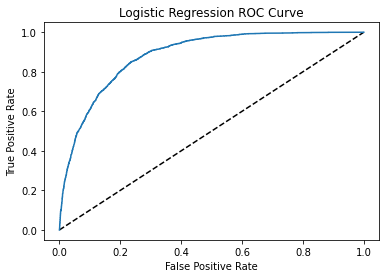

In [46]:
from sklearn.metrics import roc_curve
y_pred_prob = logreg.predict_proba(Xte)[:, 1]
fpr, tpr, thresholds = roc_curve(yte, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show();

### As you can see above, since the area under the ROC curve is large, we can safely assume that the model used is a good model

In [47]:
logreg.coef_

array([[ 0.40299661,  0.75743752,  0.38621494, -0.07140536,  0.10985973,
        -0.01600513, -0.0892235 ,  0.05976921,  0.066069  , -0.08911415,
        -0.04750756, -0.15283039, -0.25588536,  0.04764291,  0.78520468,
        -0.07976648, -0.52982816, -0.16013868, -0.11086589, -0.01293078,
        -0.10379602,  0.01161802,  0.25283968, -0.17971416, -0.1415534 ,
        -0.0927726 , -0.25834887, -0.16454192,  0.18003028,  0.07467144,
         0.08485999,  0.09751048, -0.0303907 , -0.07693846, -0.13314322,
         0.21179887, -0.08947698, -0.29364279,  0.13032758,  0.25547623,
        -0.04892944, -0.0070677 ,  0.00506132, -0.06718452,  0.03008307,
        -0.20066957,  0.20066957, -0.03854005,  0.03854005]])

### Oversampling using SMOT (Synthetic Minority Oversampling Technique) Technique

#### Since the >50K class is under-sampled the precision, recall and f1-score of this class is not great. This has also impacted the overall scores of the results. This can be corrected by oversampling the under-represented/minority class - >50K income class in this case. Let's use the SMOT class to oversample the minority class and rerun the Logistic Regression model on the new sample.

In [48]:
import imblearn
print(imblearn.__version__)

0.7.0


In [49]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [50]:
X4, y4 = smote.fit_resample(X3 , y)

In [51]:
X4.shape

(49440, 49)

In [52]:
y4.shape

(49440,)

In [53]:
X4

array([[ 0.03067056,  1.13473876, -0.03542945, ...,  0.70307135,
        -0.34095391,  0.34095391],
       [ 0.83710898,  1.13473876, -2.22215312, ...,  0.70307135,
        -0.34095391,  0.34095391],
       [-0.04264203, -0.42005962, -0.03542945, ...,  0.70307135,
        -0.34095391,  0.34095391],
       ...,
       [ 0.75763286,  1.13473876,  0.77446821, ...,  0.70307135,
        -0.34095391,  0.34095391],
       [ 0.74533291,  1.48365238, -0.03542945, ...,  0.70307135,
        -0.34095391,  0.34095391],
       [ 1.23628942, -0.42005962,  1.17941704, ...,  0.70307135,
        -0.34095391,  0.34095391]])

In [54]:
y4

array([0, 0, 0, ..., 1, 1, 1])

In [55]:
# Split the data into a training and test set.
Xtr2, Xte2, ytr2, yte2 = train_test_split(X4, y4, test_size = 0.3, random_state=42)
logreg = LogisticRegression()
# Fit the model on the trainng data.
logreg.fit(Xtr2, ytr2)
# Predict the ytest values by applying the model to Xtestlr
ypred2 = logreg.predict(Xte2)
# Print the accuracy from the testing data.

In [56]:
print(accuracy_score(yte2, ypred2))

0.8079153182308522


In [57]:
print(confusion_matrix(yte2, ypred2))

[[5655 1736]
 [1113 6328]]


In [58]:
print(classification_report(yte2, ypred2))

              precision    recall  f1-score   support

           0       0.84      0.77      0.80      7391
           1       0.78      0.85      0.82      7441

    accuracy                           0.81     14832
   macro avg       0.81      0.81      0.81     14832
weighted avg       0.81      0.81      0.81     14832



### Key findings based on Classification Report

#### As you can see above the precision, recall and f1 score for class 1 (>50K income class) have gone up significantly with the help of oversampling using SMOT technique. However please note that the overall score (wieghted average) did not improve much, and in fact reduced by 1 percentage point comnpared to the results without oversampling.

#### However we would still prefer these scores over the one without oversampling because the second sample has better and balanced representation of both the <=50K and >50K income groups

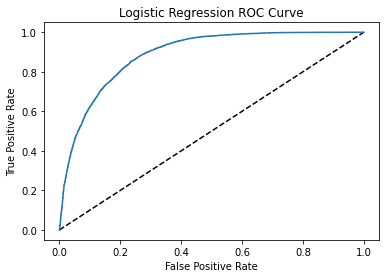

In [59]:
from sklearn.metrics import roc_curve
y_pred_prob2 = logreg.predict_proba(Xte2)[:, 1]
fpr, tpr, thresholds = roc_curve(yte2, y_pred_prob2)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show();

In [60]:
coefs = logreg.coef_
print(coefs)

[[ 0.47925996  0.78850057  0.46016436 -0.06191239  0.09977556 -0.02509952
  -0.05669537  0.06828391  0.07385494 -0.09090908 -0.0643258  -0.16672321
  -0.23721118  0.0558316   0.79607168 -0.07900416 -0.53524052 -0.19199511
  -0.13427982 -0.00765637 -0.02104066  0.01365561  0.25345333 -0.18625931
  -0.13834279 -0.08549019 -0.29564211 -0.2578976   0.20161056  0.09253307
   0.08615113  0.09151242 -0.02772193 -0.06539874 -0.11519601  0.23635309
  -0.06138681 -0.31373461  0.06454016  0.27045012 -0.03342256  0.02813881
  -0.01666085 -0.04776345  0.02140182 -0.21667817  0.21667817 -0.04987447
   0.04987447]]


In [61]:
coefs2 = coefs[0,:]
print(coefs2.shape)
print(coefs2)
print(type(coefs2))

(49,)
[ 0.47925996  0.78850057  0.46016436 -0.06191239  0.09977556 -0.02509952
 -0.05669537  0.06828391  0.07385494 -0.09090908 -0.0643258  -0.16672321
 -0.23721118  0.0558316   0.79607168 -0.07900416 -0.53524052 -0.19199511
 -0.13427982 -0.00765637 -0.02104066  0.01365561  0.25345333 -0.18625931
 -0.13834279 -0.08549019 -0.29564211 -0.2578976   0.20161056  0.09253307
  0.08615113  0.09151242 -0.02772193 -0.06539874 -0.11519601  0.23635309
 -0.06138681 -0.31373461  0.06454016  0.27045012 -0.03342256  0.02813881
 -0.01666085 -0.04776345  0.02140182 -0.21667817  0.21667817 -0.04987447
  0.04987447]
<class 'numpy.ndarray'>


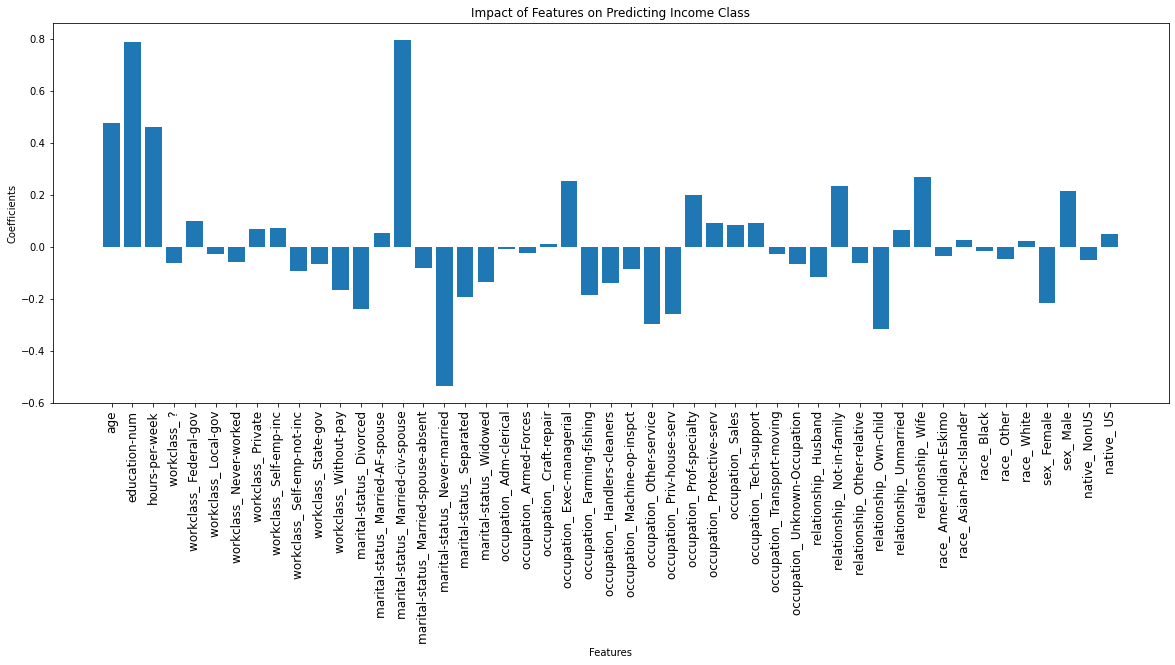

In [62]:
plt.figure(figsize=(20,7))
plt.bar(features, coefs2)

plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.title('Impact of Features on Predicting Income Class')
plt.xticks(
    rotation=90, 
    horizontalalignment='center',
    fontweight='light',
    fontsize='large')
plt.show()

### Key findings based on analysis of coefficient values for features
#### 1. Age, Education, Hours-per-Week, Married W Civil Souse, Executive-Managerial Occupation, Male categories have high and positive impact on determining and predicting income of individuals
#### 2. Marital Status of Never Married, Relationship of Own Child have significant but negative correlatoin with income
#### 3. Male class is positively correlated with income while Female class is negatively correlated with income (this could be because of lower employment status among female class
#### 4. Race does not seem to have any impact on predicting the income class
#### 5. Many low skilled income categories (e.g. Farming, Fishing, Handlers, Cleaners) have a negative correlation with income